Model Accuracy: 1.00
Enter your age of marriage: 30
Enter your gender: male


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


You are eligible for marriage.


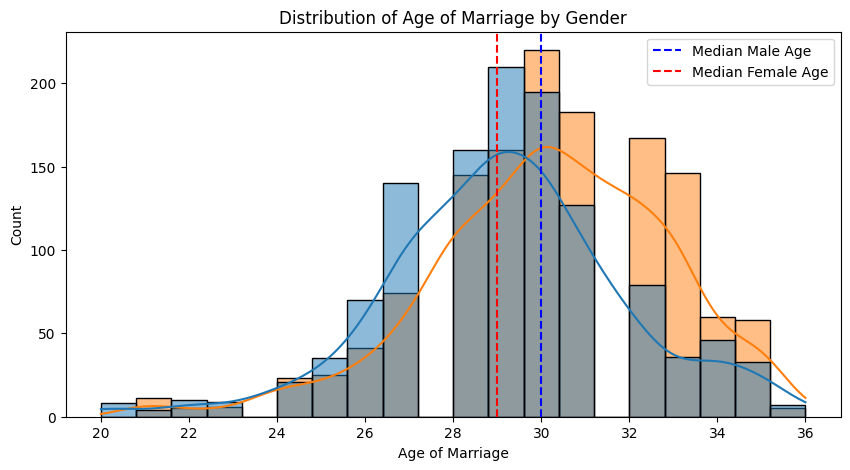

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('marriage.csv')


dataset['age_of_marriage'] = pd.to_numeric(dataset['age_of_marriage'], errors='coerce')
dataset = dataset.dropna(subset=['age_of_marriage', 'gender'])  # Remove rows with missing values


le = LabelEncoder()
dataset['gender_encoded'] = le.fit_transform(dataset['gender'])

median_age_by_gender = dataset.groupby('gender', dropna=True)['age_of_marriage'].median()
dataset['eligible'] = dataset.apply(lambda row: 1 if row['gender'] in median_age_by_gender and row['age_of_marriage'] >= median_age_by_gender[row['gender']] else 0, axis=1)


X = dataset[['age_of_marriage', 'gender_encoded']]
y = dataset['eligible']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


age_of_marriage = float(input("Enter your age of marriage: "))
gender = input("Enter your gender: ")

gender_encoded = le.transform([gender])[0] if gender in le.classes_ else None
if gender_encoded is None:
    print("Invalid gender input.")
else:

    prediction = model.predict([[age_of_marriage, gender_encoded]])


    if prediction[0] == 1:
        print("You are eligible for marriage.")
    else:
        print("You are not eligible for marriage.")

plt.figure(figsize=(10, 5))
sns.histplot(dataset, x='age_of_marriage', hue='gender', bins=20, kde=True)
if 'male' in median_age_by_gender:
    plt.axvline(x=median_age_by_gender['male'], color='blue', linestyle='--', label='Median Male Age')
if 'female' in median_age_by_gender:
    plt.axvline(x=median_age_by_gender['female'], color='red', linestyle='--', label='Median Female Age')
plt.xlabel('Age of Marriage')
plt.ylabel('Count')
plt.title('Distribution of Age of Marriage by Gender')
plt.legend()
plt.show()

